In [1]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm



In [88]:
trans= pd.read_excel('/Users/mubinaarastu/Machine Learning Models/Dataset/StoreTimeSeriesData.xlsx')


## Data PreProcessing

In [89]:
trans.head()

,Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
2,1,1,2/5/2010,False,9.99,7.99,245
3,1,1,2/12/2010,True,9.99,7.99,453
4,1,1,2/19/2010,False,9.99,7.99,409


In [90]:
trans.columns = trans.iloc[1]
trans = trans[1:]

In [91]:
trans.head()

1,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
1,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
2,1,1,2/5/2010,False,9.99,7.99,245
3,1,1,2/12/2010,True,9.99,7.99,453
4,1,1,2/19/2010,False,9.99,7.99,409
5,1,1,2/26/2010,False,9.99,7.99,191


In [92]:
trans= trans.iloc[1:]

In [93]:
trans.head()

1,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
2,1,1,2/5/2010,False,9.99,7.99,245
3,1,1,2/12/2010,True,9.99,7.99,453
4,1,1,2/19/2010,False,9.99,7.99,409
5,1,1,2/26/2010,False,9.99,7.99,191
6,1,1,3/5/2010,False,9.99,9.99,145


In [94]:
trans.dtypes

1
Store                object
Product              object
Date                 object
Is_Holiday           object
Base Price           object
Price                object
Weekly_Units_Sold    object
dtype: object

In [95]:
trans['Date'] =  pd.to_datetime(trans['Date'], format="%m/%d/%Y")

In [96]:
trans.dtypes

1
Store                        object
Product                      object
Date                 datetime64[ns]
Is_Holiday                   object
Base Price                   object
Price                        object
Weekly_Units_Sold            object
dtype: object

In [97]:
trans['Date'].min()

Timestamp('2010-02-05 00:00:00')

In [98]:
trans['Date'].max()

Timestamp('2012-10-26 00:00:00')

In [99]:
trans.isnull().sum()

1
Store                0
Product              0
Date                 0
Is_Holiday           0
Base Price           0
Price                0
Weekly_Units_Sold    0
dtype: int64

Our current datetime data can be tricky to work with, therefore, we will use the average daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [100]:
weeklysales=trans.groupby("Date")['Weekly_Units_Sold'].sum().reset_index()

In [101]:

weeklysales=weeklysales.sort_values('Date')
weeklysales.head()

,Date,Weekly_Units_Sold
0,2010-02-05,6007
1,2010-02-12,7297
2,2010-02-19,6610
3,2010-02-26,5237
4,2010-03-05,4916


In [102]:
transcopy=trans

In [103]:
weeklysales= weeklysales.set_index('Date')
weeklysales.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

In [104]:
y = weeklysales['Weekly_Units_Sold'].resample('M').mean()
y

Date
2010-02-28     6287.75
2010-03-31     4788.75
2010-04-30     7624.40
2010-05-31     4884.25
2010-06-30     4446.00
2010-07-31    10790.00
2010-08-31     6460.25
2010-09-30     4782.75
2010-10-31     4998.80
2010-11-30     6628.75
2010-12-31     6009.40
2011-01-31     4335.00
2011-02-28     5751.25
2011-03-31     4492.25
2011-04-30     7484.00
2011-05-31     4561.00
2011-06-30     4254.00
2011-07-31    10103.40
2011-08-31     6089.00
2011-09-30     4554.00
2011-10-31     4772.50
2011-11-30     6242.00
2011-12-31     5847.80
2012-01-31     4113.50
2012-02-29     5671.75
2012-03-31     4325.40
2012-04-30     6758.75
2012-05-31     4312.25
2012-06-30     3989.80
2012-07-31    10936.50
2012-08-31     5770.60
2012-09-30     4186.50
2012-10-31     4321.50
Freq: M, Name: Weekly_Units_Sold, dtype: float64

In [105]:
y['2012':]

Date
2012-01-31     4113.50
2012-02-29     5671.75
2012-03-31     4325.40
2012-04-30     6758.75
2012-05-31     4312.25
2012-06-30     3989.80
2012-07-31    10936.50
2012-08-31     5770.60
2012-09-30     4186.50
2012-10-31     4321.50
Freq: M, Name: Weekly_Units_Sold, dtype: float64

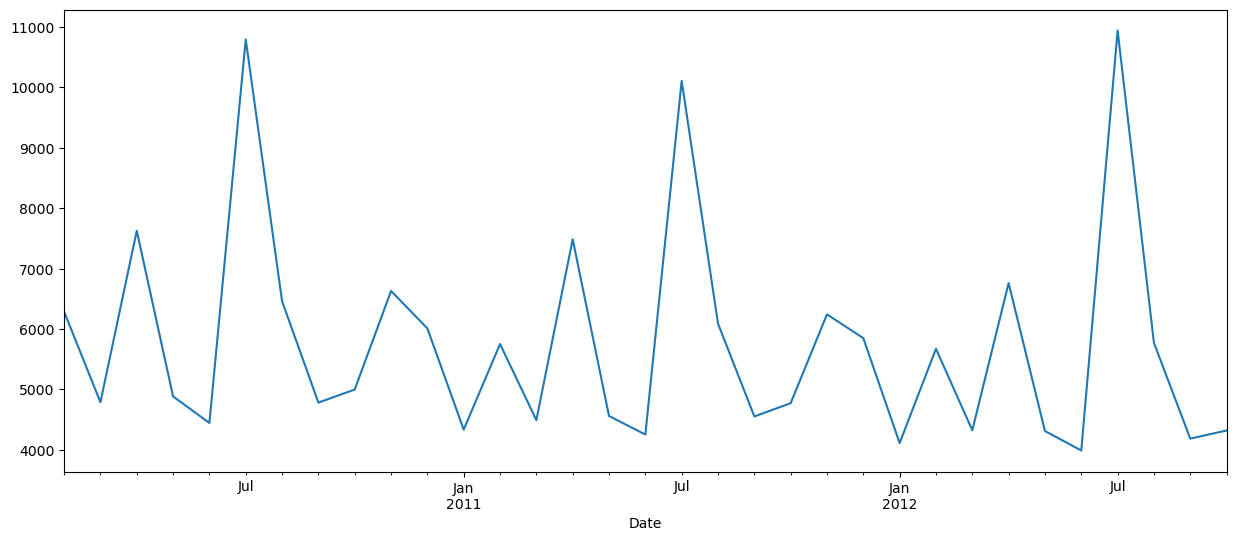

In [106]:
y.plot(figsize=(15, 6))
plt.show()

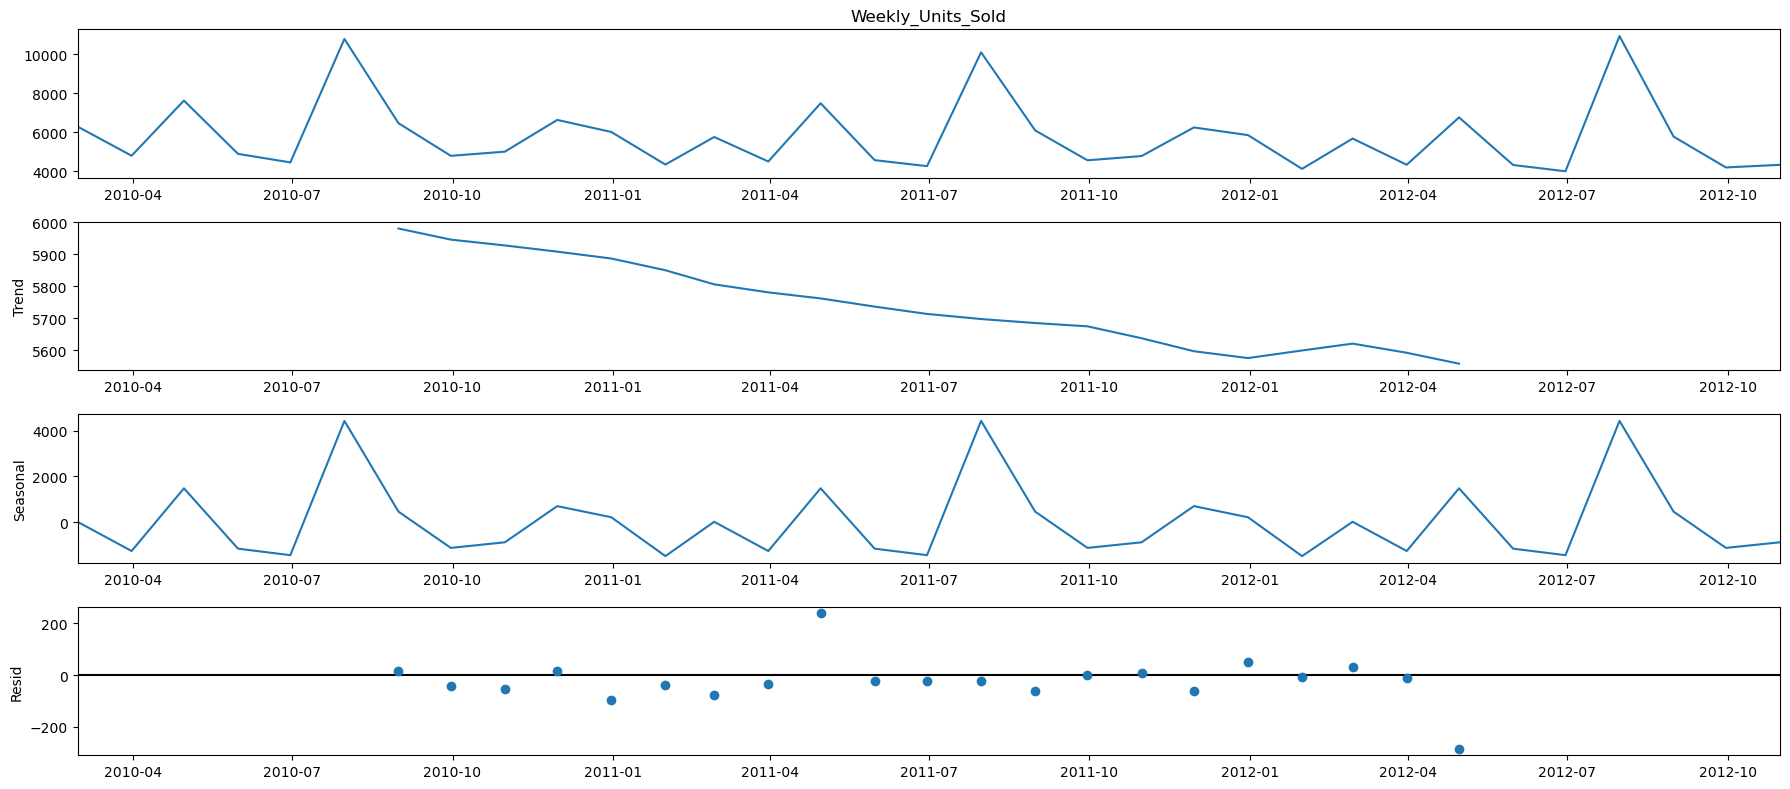

In [107]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model

In [108]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [109]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            ##enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01277D+01    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   1.013D+01
  F =   10.127705530895232     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:670.4285650390854
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69642D+00    |proj g|=  6.73555D-01

At iterate    5    f=  4.58031D+00    |proj g|=  6.46936D-04

At iterate   10    f=  4.58026D+00    |proj g|=  1.17395D-02

At iterate   15    f=  4.57375D+00    |proj g|=  1.20793D-01

At iterate   20    f=  4.53650D+00    |proj g|=  5.34689D-04

At iterate   25    f=  4.53636D+00    |proj g|=  7.10393D-03

At iterate   30    f=  4.53625D+00    |proj g|=  4.79252D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  9.75966D+00    |proj g|=  1.09669D-01

At iterate   30    f=  8.80606D+00    |proj g|=  4.59187D-01

At iterate   35    f=  8.50991D+00    |proj g|=  1.02050D-01

At iterate   40    f=  8.31512D+00    |proj g|=  1.17083D-01

At iterate   45    f=  8.26888D+00    |proj g|=  4.04770D-02

At iterate   50    f=  8.26385D+00    |proj g|=  1.12715D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     64      1     0     0   1.127D-03   8.264D+00
  F =   8.2638534883436527     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:553.4143302306

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     34      1     0     0   1.971D-06   4.528D+00
  F =   4.5277225600018056     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:306.8296889601192
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.08780D+00    |proj g|=  1.08241D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projecte

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  8.09169D+00    |proj g|=  3.74380D-01

At iterate   35    f=  8.07054D+00    |proj g|=  5.00328D-02

At iterate   40    f=  8.06674D+00    |proj g|=  4.92080D-02

At iterate   45    f=  8.06573D+00    |proj g|=  1.48978D-02

At iterate   50    f=  8.06572D+00    |proj g|=  1.05777D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50    117      2     0     0   1.058D-04   8.066D+00
  F =   8.0657201658386750     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:538.3375309453526
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.78444D+00    |proj g|=  9.40975D-03

At iterate   30    f=  7.78376D+00    |proj g|=  2.35854D-02

At iterate   35    f=  7.78352D+00    |proj g|=  3.03175D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     51      1     0     0   3.032D-05   7.784D+00
  F =   7.7835202695904417     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:519.7123377929692
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.28319D+00    |proj g|=  1.95568D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     30      1     0     0   2.782D-06   4.283D+00
  F =   4.2828424232070539     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:288.66759993166556
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42608D+00    |proj g|=  2.38466D-01

At iterate    5    f=  4.37858D+00    |proj g|=  2.55425D-02

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.19988D+00    |proj g|=  7.75984D-03

At iterate   10    f=  9.19929D+00    |proj g|=  2.11975D-04

At iterate   15    f=  9.19904D+00    |proj g|=  5.99388D-03

At iterate   20    f=  9.11725D+00    |proj g|=  1.53954D-01

At iterate   25    f=  9.08664D+00    |proj g|=  4.93191D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   8.415D-06   9.087D+00
  F =   9.0866433803158255     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:605.7184631008445
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.10495D+00    |proj g|=  3.15186D-04

At iterate   15    f=  9.10492D+00    |proj g|=  1.78974D-03

At iterate   20    f=  9.10345D+00    |proj g|=  3.31756D-02

At iterate   25    f=  8.36456D+00    |proj g|=  6.13702D-02
  ys=-1.395E-01  -gs= 2.898E-01 BFGS update SKIPPED

At iterate   30    f=  8.21192D+00    |proj g|=  1.62906D-01

At iterate   35    f=  8.10392D+00    |proj g|=  1.92663D-02

At iterate   40    f=  8.05898D+00    |proj g|=  1.71076D-02

At iterate   45    f=  8.05581D+00    |proj g|=  2.20304D-02

At iterate   50    f=  8.05541D+00    |proj g|=  1.01294D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.52635D+00    |proj g|=  6.01729D-03

At iterate   30    f=  4.52612D+00    |proj g|=  5.56644D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     34      1     0     0   1.756D-06   4.526D+00
  F =   4.5261184830337973     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:306.7238198802306
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.12720D+00    |proj g|=  3.49562D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80713D+00    |proj g|=  9.50642D-01

At iterate    5    f=  4.57369D+00    |proj g|=  6.08589D-04

At iterate   10    f=  4.57357D+00    |proj g|=  1.25708D-02

At iterate   15    f=  4.57283D+00    |proj g|=  2.06069D-02

At iterate   20    f=  4.57098D+00    |proj g|=  1.21968D-02

At iterate   25    f=  4.57090D+00    |proj g|=  2.59007D-03

At iterate   30    f=  4.56923D+00    |proj g|=  4.58819D-02

At iterate   35    f=  4.54330D+00    |proj g|=  1.01002D-01

At iterate   40    f=  4.53462D+00    |proj g|=  2.71718D-03

At iterate   45    f=  4.53460D+00    |proj g|=  2.07756D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


  ys=-1.905E-01  -gs= 4.946E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     94      1     2     0   1.901D+01   8.163D+00
  F =   8.1628649218624343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:548.7490848429206
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85427D+00    |proj g|=  1.09836D+00

At iterate    5    f=  4.60019D+00    |proj g|=  1.25178D-02

At iterate   10    f=  4

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.56925D+00    |proj g|=  1.90846D-02

At iterate   20    f=  4.56815D+00    |proj g|=  3.25580D-02

At iterate   25    f=  4.56674D+00    |proj g|=  1.75054D-03

At iterate   30    f=  4.56670D+00    |proj g|=  4.56508D-03

At iterate   35    f=  4.56181D+00    |proj g|=  6.18057D-02

At iterate   40    f=  4.53530D+00    |proj g|=  5.67756D-02

At iterate   45    f=  4.52626D+00    |proj g|=  1.51542D-02

At iterate   50    f=  4.52602D+00    |proj g|=  7.15132D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   7.151D-05   4.526D+00
  F =   4.52602441622

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.42248D+00    |proj g|=  3.45798D-04

At iterate   10    f=  4.42134D+00    |proj g|=  2.40748D-02

At iterate   15    f=  4.41234D+00    |proj g|=  3.30156D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   2.580D-06   4.412D+00
  F =   4.4123237480576361     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:297.213367371804
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:293.8982503537207
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.86441D+00    |proj g|=  3.90828D-01

At iterate    5    f=  8.76154D+00    |proj g|=  3.88178D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   1.040D-04   8.762D+00
  F =   8.7615413680330718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:584.2617302901828
RUNNING THE L-BFGS-B C

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:292.6956655719997
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.86441D+00    |proj g|=  4.57963D-01

At iterate    5    f=  8.59126D+00    |proj g|=  2.02171D-02

At iterate   10    f=  8.59016D+00    |proj g|=  7.60466D-04

At iterate   15    f=  8.58961D+00    |proj g|=  1.51498D-02

At iterate   20    f=  8.17576D+00    |proj g|=  9.57895D-01
  ys=-5.069E-01  -gs= 5.170E-01 BFGS update SKIPPED

At iterate   25    f=  8.15624D+00    |proj g|=  3.36929D-02

At iterate   30    f=  7.99743D+00    |proj g|=  2.40080D-01

At iterate   35    f=  7.93699D+00    |proj g|=  5.92434D-04

At iterate   40    f=  7.93659D+00    |proj g|=  3.07108D-02

At iterate   45    f=  7.88906D+00    |proj g|=  5.72688D-01

At iterate   50    f=  7.78475D+00    |proj g|=  2.02901D-01

           * * *

Tit   = total number of i

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   10    f=  8.58674D+00    |proj g|=  1.49552D-03

At iterate   15    f=  8.58674D+00    |proj g|=  7.39552D-04

At iterate   20    f=  8.58632D+00    |proj g|=  1.05061D-02

At iterate   25    f=  8.52695D+00    |proj g|=  2.32509D-01

At iterate   30    f=  8.14254D+00    |proj g|=  5.81910D-01

At iterate   35    f=  7.79995D+00    |proj g|=  1.56416D-01

At iterate   40    f=  7.77676D+00    |proj g|=  5.23664D-02

At iterate   45    f=  7.72992D+00    |proj g|=  7.90217D-02

At iterate   50    f=  7.72268D+00    |proj g|=  4.15638D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     72   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.28386D+00    |proj g|=  5.24298D-02

At iterate   30    f=  4.28212D+00    |proj g|=  2.01394D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     39      1     0     0   2.014D-06   4.282D+00
  F =   4.2821185159002511     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:290.6198220494166
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43926D+00    |proj g|=  2.48768D-01

At iterate    

In [110]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                ##enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43926D+00    |proj g|=  2.48758D-01

At iterate    5    f=  4.37890D+00    |proj g|=  4.87207D-02

At iterate   10    f=  4.37712D+00    |proj g|=  8.11702D-04

At iterate   15    f=  4.37689D+00    |proj g|=  1.55659D-02

At iterate   20    f=  4.34432D+00    |proj g|=  1.82032D-01

At iterate   25    f=  4.28386D+00    |proj g|=  5.24298D-02

At iterate   30    f=  4.28212D+00    |proj g|=  2.01394D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


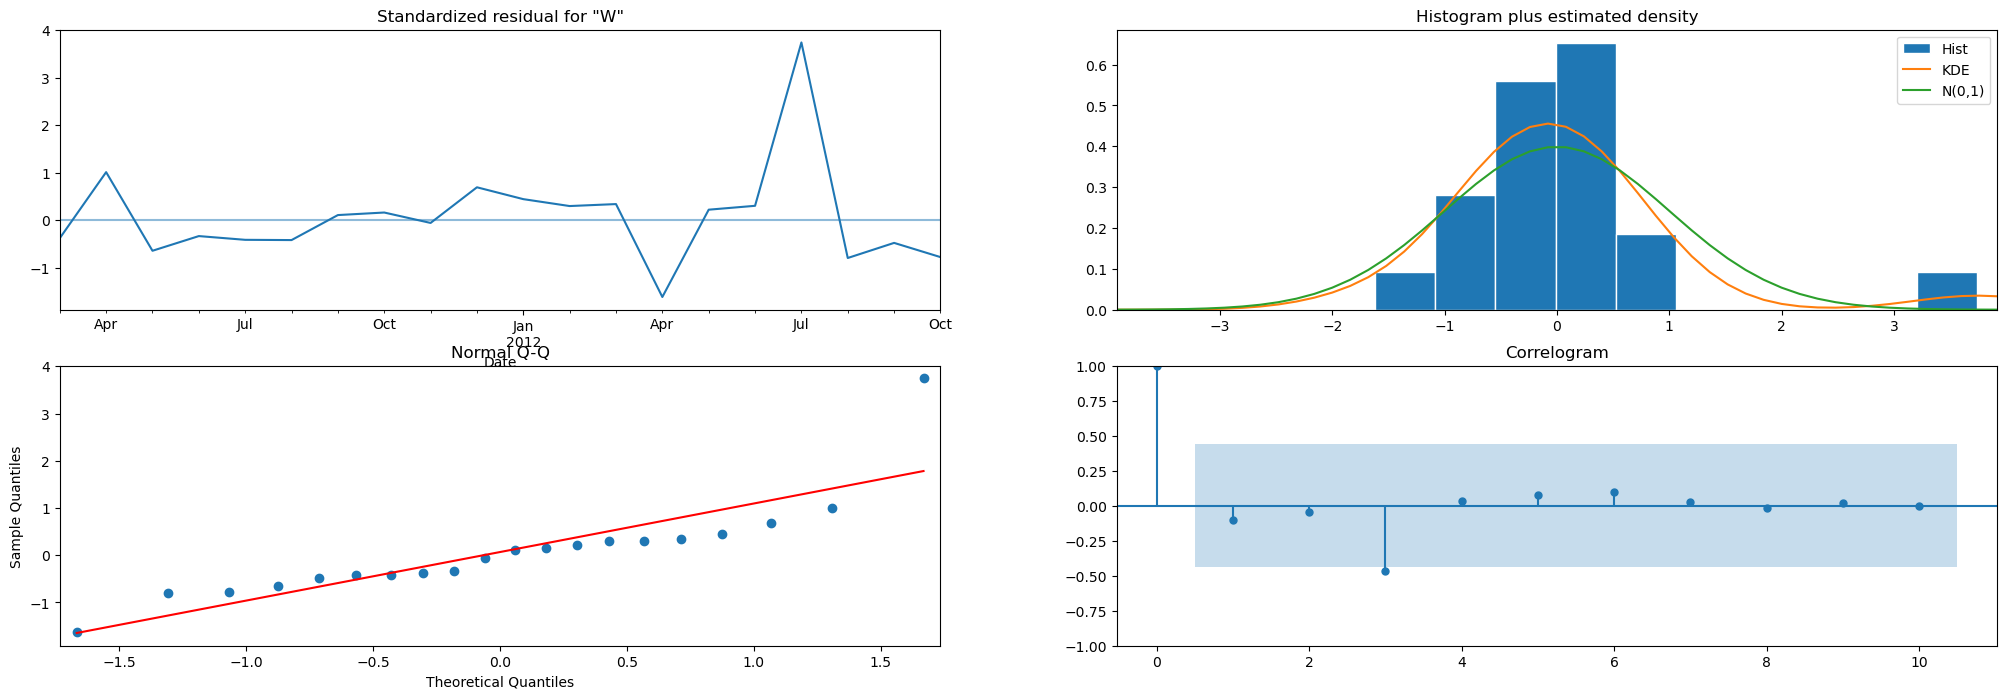

In [111]:
results.plot_diagnostics(figsize=(25, 8))
plt.show()

### Validate Forecasting

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2012-01-31 to the end of the data.

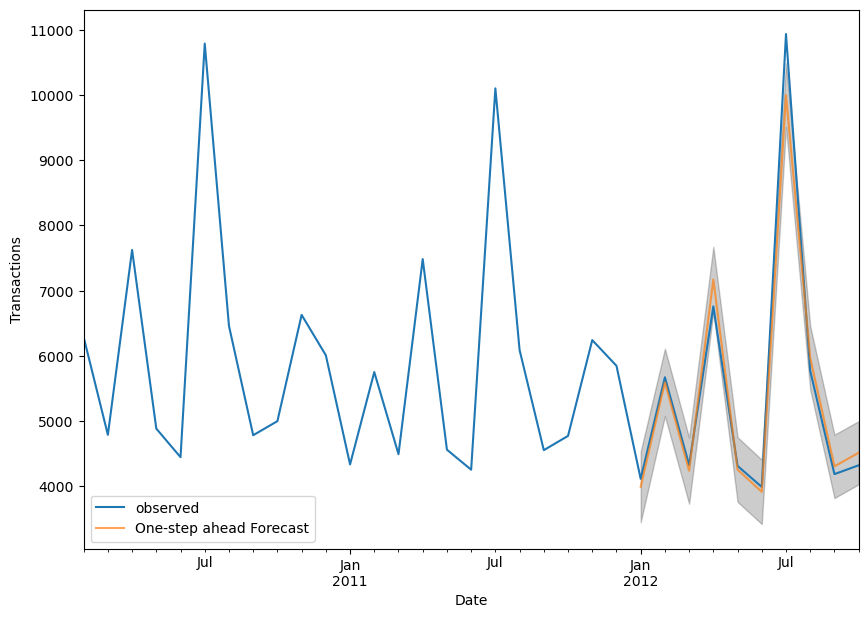

In [112]:
pred = results.get_prediction(start=pd.to_datetime('2012-01-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Transactions')
plt.legend()

plt.show()

***The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.***

In [113]:
y_forecasted = pred.predicted_mean
y_truth = y['2012-01-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 117651.73


In [114]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 343.0


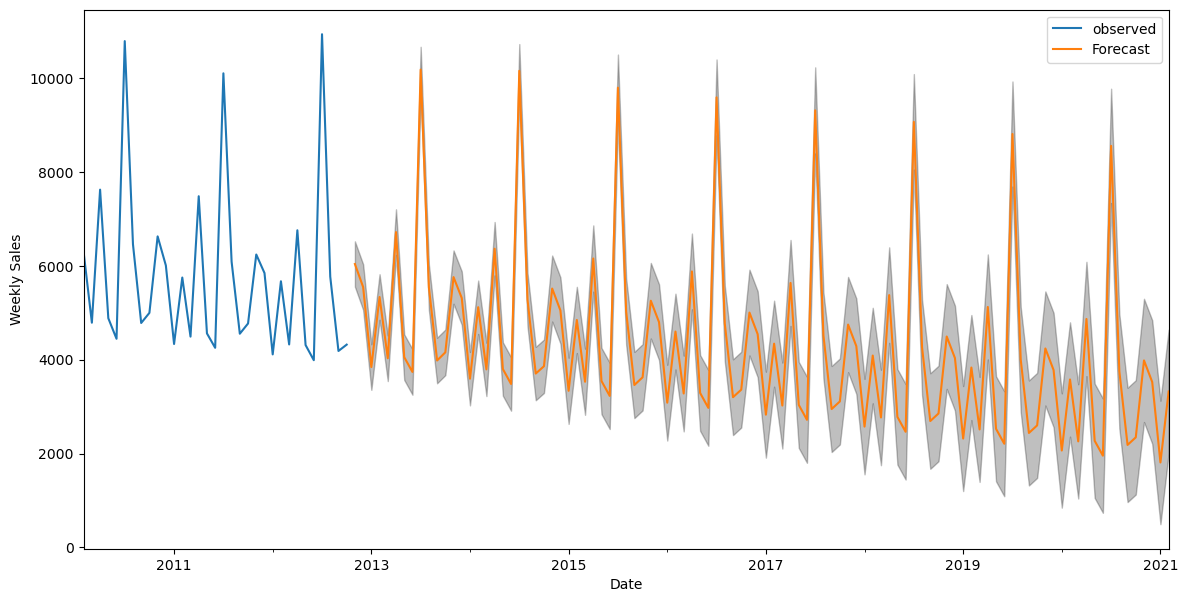

In [116]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')

plt.legend()
plt.show()

In [117]:
import stan

In [118]:
transcopy.head()

1,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
2,1,1,2010-02-05,False,9.99,7.99,245
3,1,1,2010-02-12,True,9.99,7.99,453
4,1,1,2010-02-19,False,9.99,7.99,409
5,1,1,2010-02-26,False,9.99,7.99,191
6,1,1,2010-03-05,False,9.99,9.99,145


In [125]:
pricedf= transcopy.groupby('Date')['Price'].sum().reset_index()

In [126]:
from prophet import Prophet

transac = transcopy.rename(columns={'Date': 'ds', 'Weekly_Units_Sold': 'y'})
transac_model = Prophet(interval_width=0.95)
transac_model.fit(transac)

price= pricedf.rename(columns={'Date': 'ds', 'Price': 'y'})
price_model = Prophet(interval_width=0.95)
price_model.fit(price)

12:54:27 - cmdstanpy - INFO - Chain [1] start processing
12:54:27 - cmdstanpy - INFO - Chain [1] done processing
12:54:27 - cmdstanpy - INFO - Chain [1] start processing
12:54:27 - cmdstanpy - INFO - Chain [1] done processing


In [127]:
weekly_forecast = transac_model.make_future_dataframe(periods=36, freq='MS')
weekly_forecast = transac_model.predict(weekly_forecast)

price_forecast = price_model.make_future_dataframe(periods=36, freq='MS')
price_forecast = price_model.predict(price_forecast)


<Figure size 1800x600 with 0 Axes>

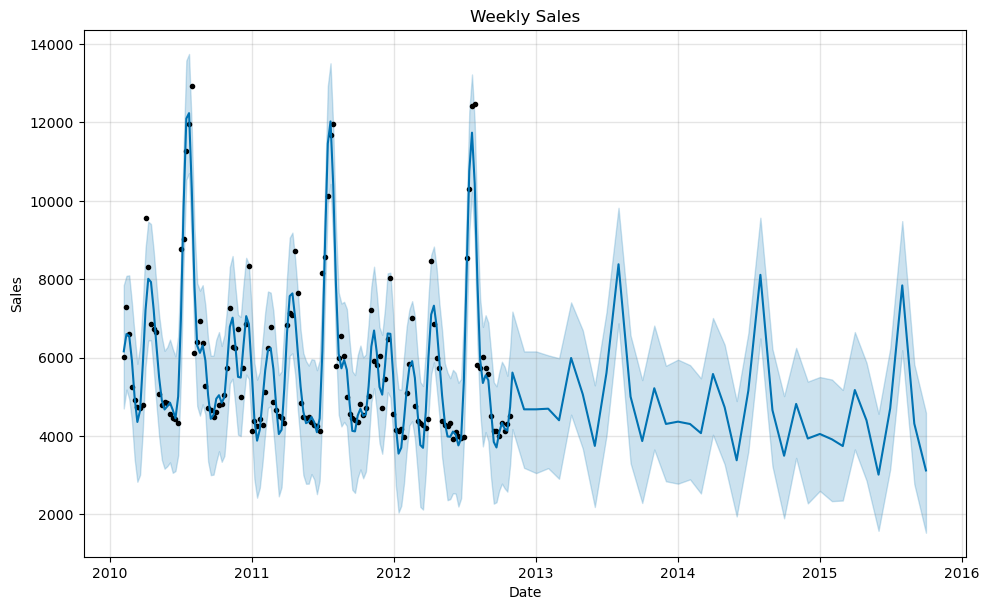

In [75]:
plt.figure(figsize=(18, 6))
transac_model.plot(weekly_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Weekly Sales');

<Figure size 1800x600 with 0 Axes>

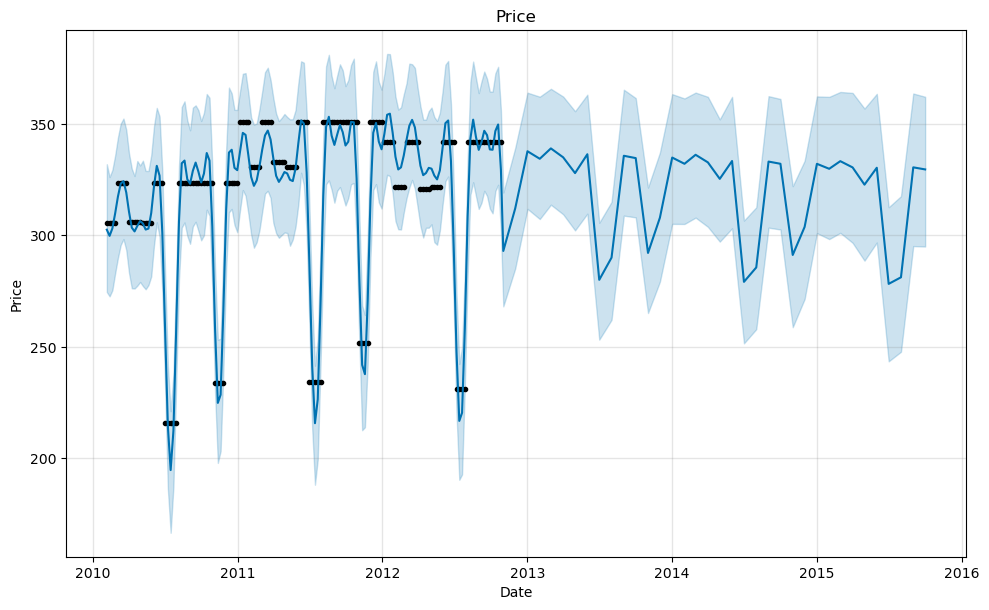

In [128]:
plt.figure(figsize=(18, 6))
price_model.plot(price_forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Price');

### Compare forecasts

In [130]:
weekly_sales_names = ['sales_%s' % column for column in weekly_forecast.columns]
price_names = ['price_%s' % column for column in price_forecast.columns]

merge_sales_forecast = weekly_forecast.copy()
merge_price_forecast = price_forecast.copy()

merge_sales_forecast.columns = weekly_sales_names
merge_price_forecast.columns = price_names

forecast = pd.merge(merge_sales_forecast, merge_price_forecast, how = 'inner', left_on = 'sales_ds', right_on = 'price_ds')

forecast = forecast.rename(columns={'sales_ds': 'Date'}).drop('price_ds', axis=1)
forecast.head()

,Date,sales_trend,sales_yhat_lower,sales_yhat_upper,sales_trend_lower,sales_trend_upper,sales_additive_terms,sales_additive_terms_lower,sales_additive_terms_upper,sales_yearly,...,price_additive_terms,price_additive_terms_lower,price_additive_terms_upper,price_yearly,price_yearly_lower,price_yearly_upper,price_multiplicative_terms,price_multiplicative_terms_lower,price_multiplicative_terms_upper,price_yhat
0,2010-02-05,232.878519,-203.049829,650.166528,232.878519,232.878519,-5.300224,-5.300224,-5.300224,-5.300224,...,7.883345,7.883345,7.883345,7.883345,7.883345,7.883345,0.0,0.0,0.0,302.570899
1,2010-02-12,232.626844,-218.486121,681.664233,232.626844,232.626844,11.334873,11.334873,11.334873,11.334873,...,4.695814,4.695814,4.695814,4.695814,4.695814,4.695814,0.0,0.0,0.0,299.813828
2,2010-02-19,232.375168,-242.658113,709.811984,232.375168,232.375168,9.782188,9.782188,9.782188,9.782188,...,7.602650,7.602650,7.602650,7.602650,7.602650,7.602650,0.0,0.0,0.0,303.151124
3,2010-02-26,232.123493,-244.853695,657.915718,232.123493,232.123493,-13.247977,-13.247977,-13.247977,-13.247977,...,13.879403,13.879403,13.879403,13.879403,13.879403,13.879403,0.0,0.0,0.0,309.858336
4,2010-03-05,231.871818,-272.029058,597.134620,231.871818,231.871818,-48.066048,-48.066048,-48.066048,-48.066048,...,20.984710,20.984710,20.984710,20.984710,20.984710,20.984710,0.0,0.0,0.0,317.394102


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


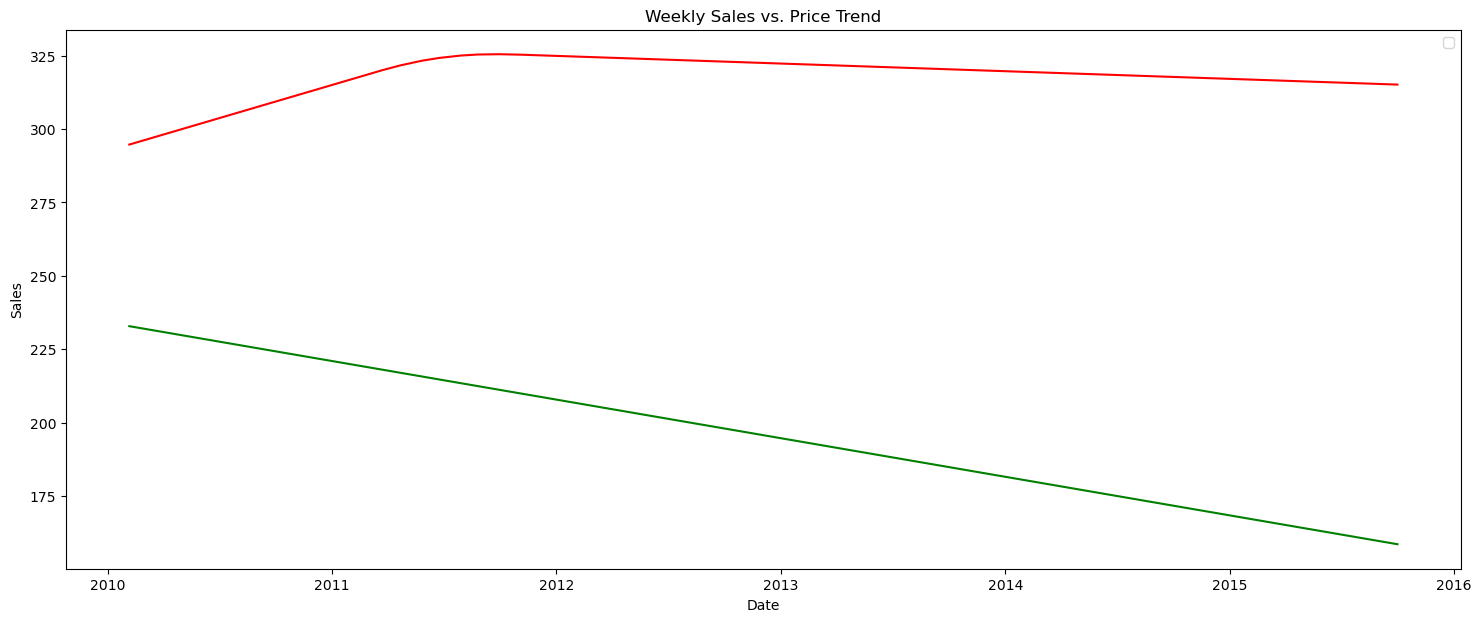

In [137]:
plt.figure(figsize=(18, 7))
plt.plot(forecast['Date'], forecast['sales_trend'], 'g-')
plt.plot(forecast['Date'], forecast['price_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Weekly Sales vs. Price Trend');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


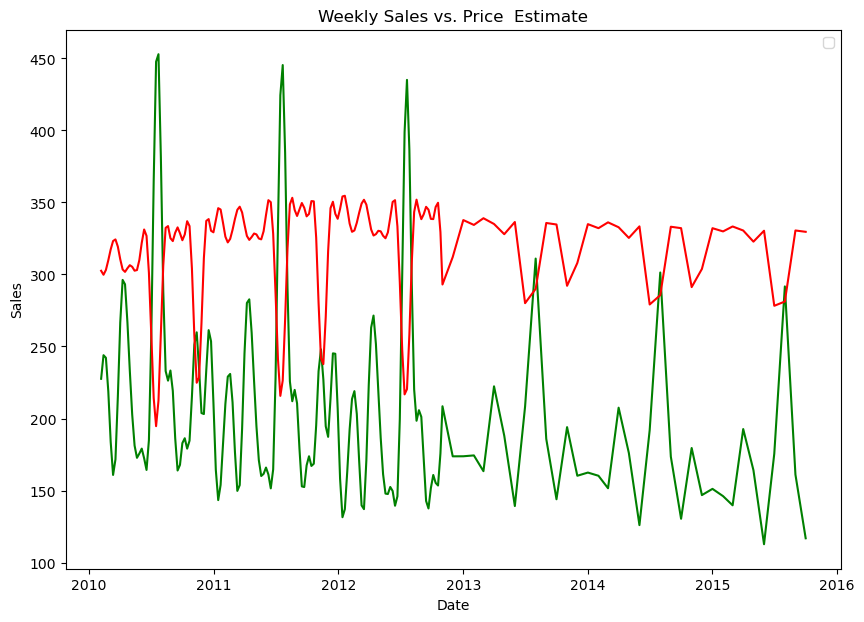

In [139]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['sales_yhat'], 'g-')
plt.plot(forecast['Date'], forecast['price_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Weekly Sales vs. Price  Estimate');

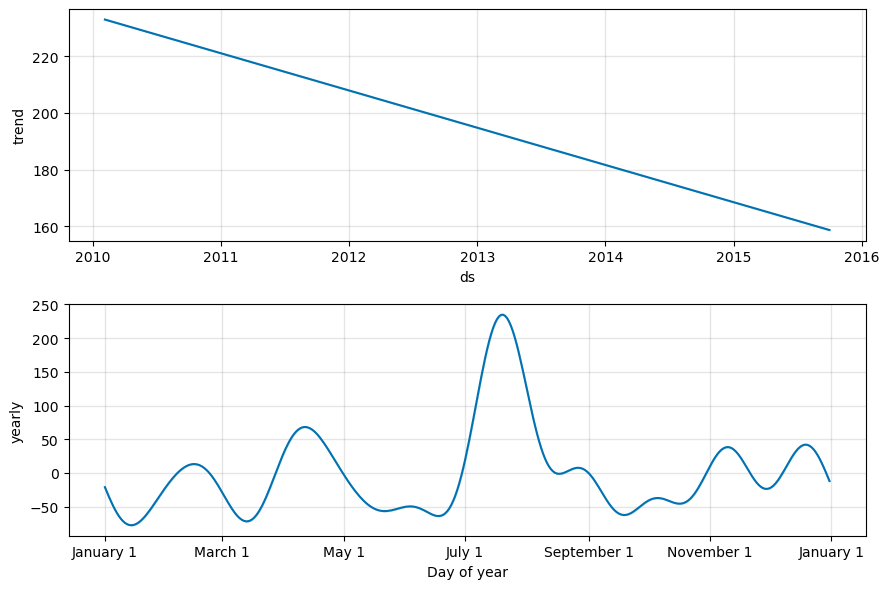

In [140]:
transac_model.plot_components(weekly_forecast);

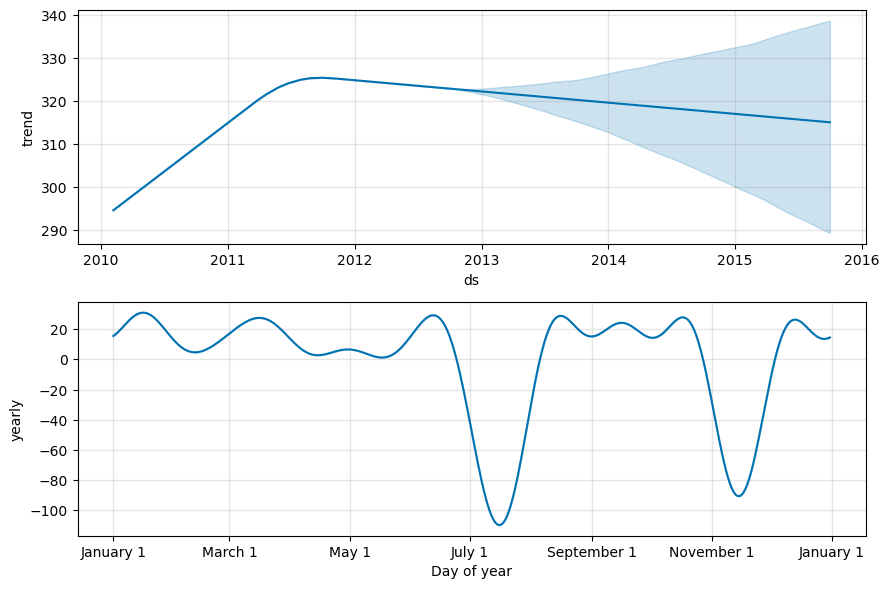

In [141]:
price_model.plot_components(price_forecast);

### Conclusion

We can see that the weekly sales has been decreasing over time whereas Price has been linearly stable.

The worst month for Sales is January.
The best month for Sales is August.



#### Here are a few steps that we can use to validate our time series machine learning models:

***1.Compare the results of your model with those of a baseline method, such as a simple moving average.***

***2.Compare the predictions of your model against actual data.***

***3.Use rolling windows to test how well the model performs on data that is one step or several steps ahead of the current time point.***

***4.Compare the predictions of your model against those made by a human expert.***

***5.Use machine learning techniques, such as k-fold cross-validation, to test the generalization accuracy of your model.***